# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

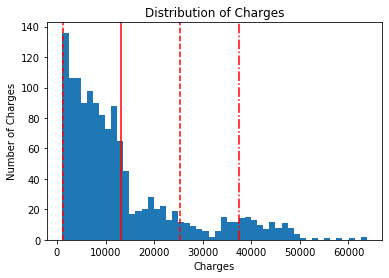

In [10]:
charges = medical['charges']
mean_charges = np.mean(charges)
std_charges = np.std(charges)


_ = plt.hist(medical['charges'], bins=50)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Number of Charges')
_ = plt.title('Distribution of Charges')
_ = plt.axvline(mean_charges, color='r')
_ = plt.axvline(mean_charges+std_charges, color='r', linestyle='--')
_ = plt.axvline(mean_charges-std_charges, color='r', linestyle='--')
_ = plt.axvline(mean_charges+2*std_charges, color='r', linestyle='-.')

In [16]:

print('The mean of this distribution is ', mean_charges, ' and standard deviaton ', std_charges)
print(charges.describe())

The mean of this distribution is  13270.422265141257  and standard deviaton  12105.484975561605
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


This definitely not a normal distribution, but the mean and standard deviation do give some information. The median (50%) is at 9382 and is some reason for the administration to be concerned that the average may be below 12000. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Based on just this random sample it is not possible to answer the question. However, if we could take several random samples and look at the distribution of the means then the CLT tells us the mean should be close to the population mean and we could answer the question.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__In this case we want to determine if the mean is below 12000. A one-sided test would be appropriate. 

In [15]:
import scipy.stats
cv_t = scipy.stats.t.ppf(q=1-.05,df=1338)
print(cv_t)

1.645993261580807


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ H0: Mean of people who file insurance is same as those who do not
       H1: Mean is different

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

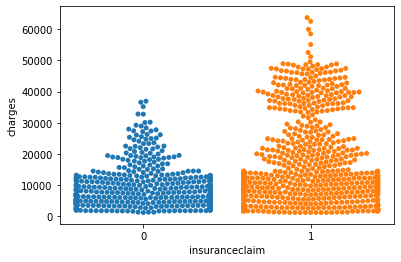

In [24]:
import seaborn as sns
df_insured = medical[medical['insuranceclaim'] == 1]
df_uninsured = medical[medical['insuranceclaim'] == 0]

# plot a swarm plot of charges for insured and uninsured
ax = sns.swarmplot(x='insuranceclaim', y='charges', data=medical)

In [25]:
n0 = len(df_uninsured)
n1 = len(df_insured)

print(n0,n1)

555 783


In [26]:
print("Statistics for Uninsured Group")
print(df_uninsured['charges'].describe())

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64


In [27]:
print("Statistics for Insured Group")
print(df_insured['charges'].describe())

Statistics for Insured Group
count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64


In [31]:
 scipy.stats.ttest_ind(df_insured['charges'], df_uninsured['charges'], axis=0)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [38]:
x0bar = np.mean(df_uninsured['charges'])
s0 = np.std(df_uninsured['charges'])
x1bar = np.mean(df_insured['charges'])
s1 = np.std(df_insured['charges'])
sp = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2)/(n0+n1-2))
print(sp)
t = (x0bar - x1bar)/sp*np.sqrt(1/n0+1/n1)
mean_diff = np.mean(df_insured['charges']) - np.mean(df_uninsured['charges'])
print(mean_diff)
print(sp, t)

s0  6440.699841605233
s1  14036.956250260411
177063630488.59692
11512.282899205744
7602.506384231368
11512.282899205744 -0.036643422020818765


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ statsmodels.stats.weightstats.ztest test for mean based on normal distribution, one or two samples

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test